In [2]:
using LinearAlgebra, Plots; 

## Drunk Walk on Integers

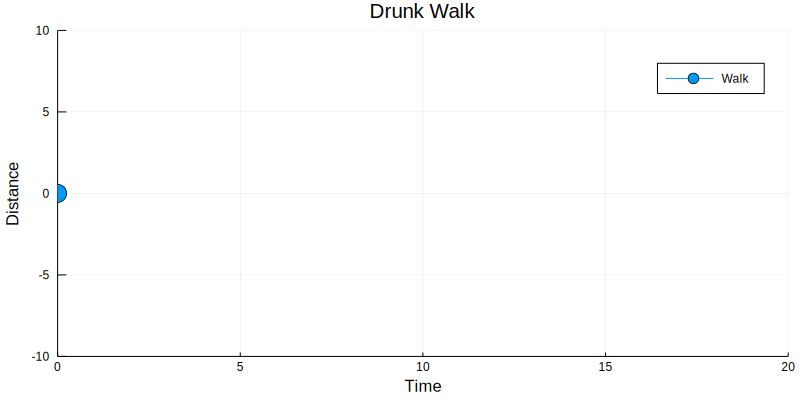

In [3]:
plt = plot(size=(800,400),xlabel="Time",ylabel="Distance",title="Drunk Walk", ylimit=(-10,10),xlimit=(0,20))
plot!(plt,[0],[0],marker=:circle,markersize=10,label="Walk")

┌ Info: Saved animation to 
│   fn = C:\Users\masahiro\UQ2\markov_20.gif
└ @ Plots C:\Users\masahiro\.julia\packages\Plots\fGqyH\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\masahiro\\UQ2\\markov_20.gif")
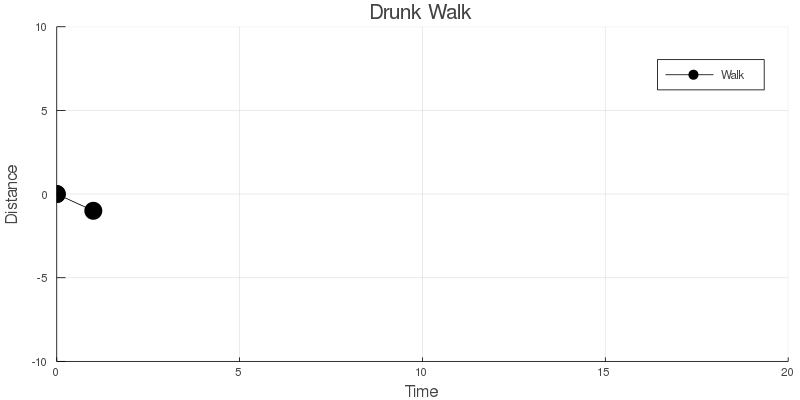

In [4]:
maxX = 20
plt = plot(size=(800,400),xlabel="Time",ylabel="Distance",title="Drunk Walk", ylimit=(-10,10),xlimit=(0,maxX));
dw = [0]
plot!(plt,[0],dw,marker=:circle,markersize=10,color=:black, label="Walk");

anim = @animate for i = 1:maxX
    if rand() < 0.5 push!(dw,dw[end]-1) else push!(dw,dw[end]+1) end
    plot!(plt,0:i,dw,marker=:circle,markersize=10, color=:black, label="");
end;

gif(anim, "./markov_20.gif", fps = 1)

┌ Info: Saved animation to 
│   fn = C:\Users\masahiro\UQ2\markov_50.gif
└ @ Plots C:\Users\masahiro\.julia\packages\Plots\fGqyH\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\masahiro\\UQ2\\markov_50.gif")
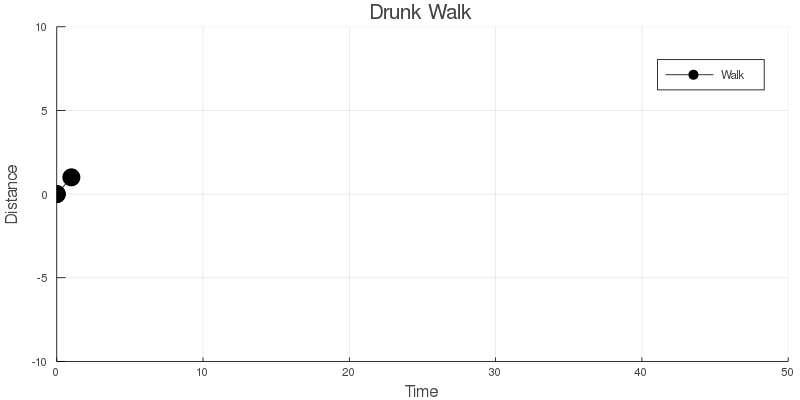

In [5]:
maxX = 50
plt = plot(size=(800,400),xlabel="Time",ylabel="Distance",title="Drunk Walk", ylimit=(-10,10),xlimit=(0,maxX));
dw = [0]
plot!(plt,[0],dw,marker=:circle,markersize=10,color=:black, label="Walk");

anim = @animate for i = 1:maxX
    if rand() < 0.5 push!(dw,dw[end]-1) else push!(dw,dw[end]+1) end
    plot!(plt,0:i,dw,marker=:circle,markersize=10, color=:black, label="");
end;

gif(anim, "./markov_50.gif", fps = 10)

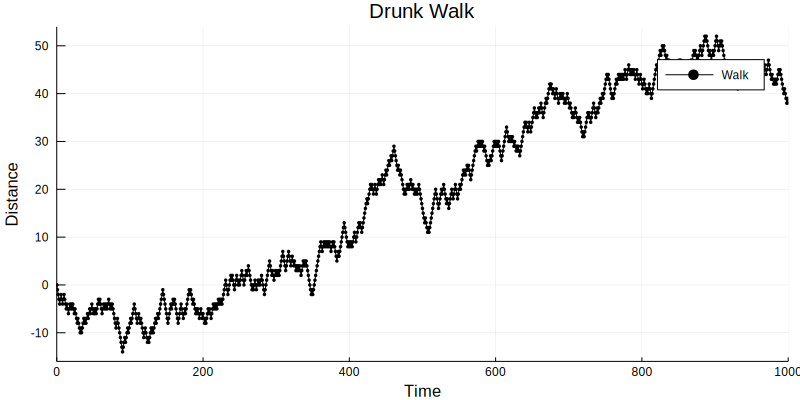

In [6]:
maxX = 1000
plt = plot(size=(800,400),xlabel="Time",ylabel="Distance",title="Drunk Walk",xlimit=(0,maxX));
dw = [0]
plot!(plt,[0],dw,marker=:circle,markersize=2,color=:black, label="Walk");

for i = 1:maxX
    if rand() < 0.5 push!(dw,dw[end]-1) else push!(dw,dw[end]+1) end
end
plot!(plt,0:maxX,dw,marker=:circle,markersize=2, color=:black, label="")
plt

In [7]:
maxX = 1000
plt = plot(size=(800,400),xlabel="Time",ylabel="Distance",title="Drunk Walk",xlimit=(0,maxX));

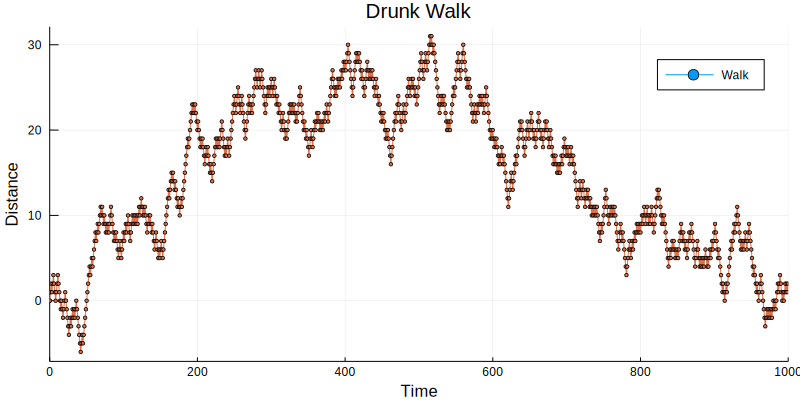

In [8]:
dw = [0]
plot!(plt,[0],dw,marker=:circle,markersize=2, label="Walk");

for i = 1:maxX
    if rand() < 0.5 push!(dw,dw[end]-1) else push!(dw,dw[end]+1) end
end
plot!(plt,0:maxX,dw,marker=:circle,markersize=2, label="")
plt

In [9]:
function my_drunk_walk(maxX)
    wd = [0]
    for i = 1:maxX
        if rand() < 0.5 push!(dw,dw[end]-1) else push!(dw,dw[end]+1) end
    end
    return dw
end

my_drunk_walk (generic function with 1 method)

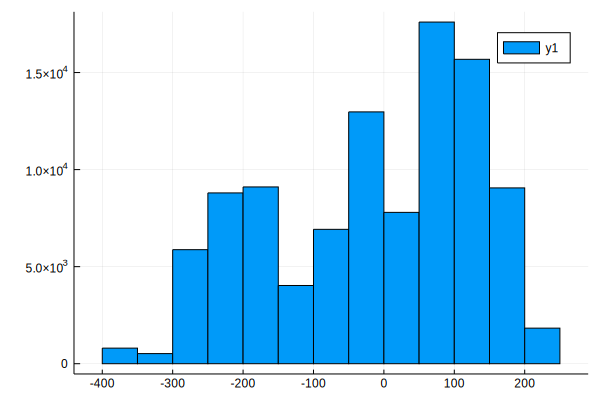

In [10]:
dw = my_drunk_walk(100000)
histogram(dw,bins=20)

## Drunk Walk with Reflecting Boundaries at x = -5 & 5

In [11]:
maxX = 100
plt = plot(size=(800,400),xlabel="Time",ylabel="Distance",title="Drunk Walk",ylimit=(-6,6),xlimit=(0,maxX));

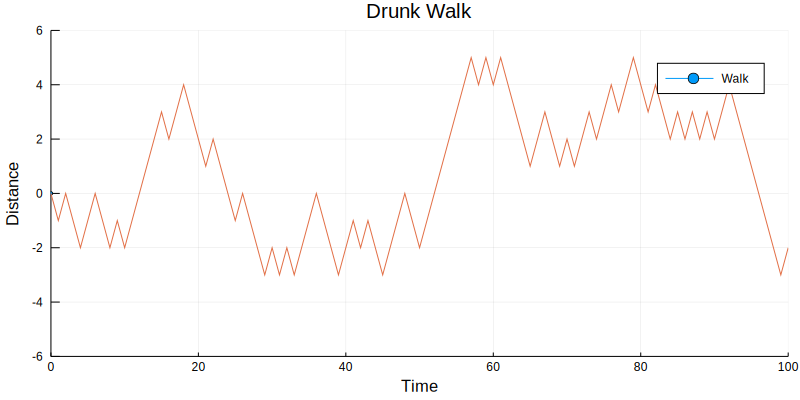

In [12]:
dw = [0]
plot!(plt,[0],dw,marker=:circle,markersize=2, label="Walk");

for i = 1:maxX
    if dw[end] == 5 
        push!(dw,4) 
    elseif dw[end] == -5 
        push!(dw,-4) 
    elseif rand() < 0.5 
        push!(dw,dw[end]-1) 
    else 
        push!(dw,dw[end]+1) 
    end
end
plot!(plt,0:maxX,dw, label="")
plt

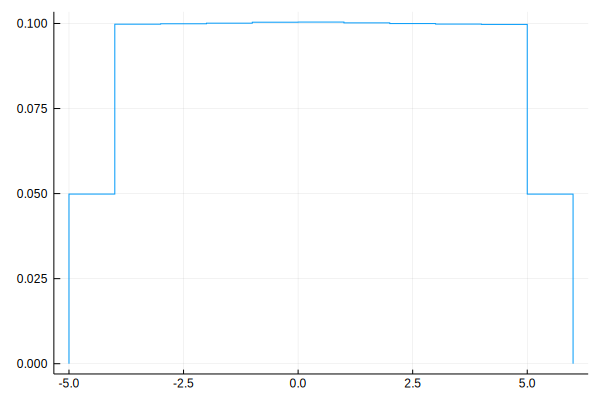

In [13]:
dw = [0]
maxX = 10000000
for i = 1:maxX
    if dw[end] == 5 
        push!(dw,4) 
    elseif dw[end] == -5 
        push!(dw,-4) 
    elseif rand() < 0.5 
        push!(dw,dw[end]-1) 
    else 
        push!(dw,dw[end]+1) 
    end
end

histogram(dw,bins=-5:6,label="", normed=true)

## Using Matricies Instead

In [14]:
A = Tridiagonal(0.5*ones(10),zeros(11),0.5*ones(10))
A[2,1] = 1.0
A[10,11] = 1.0
A

11×11 Tridiagonal{Float64,Array{Float64,1}}:
 0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 1.0  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  1.0
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0

In [15]:
x = zeros(11)
x[1] = 1
x

11-element Array{Float64,1}:
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
A*x

11-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [17]:
x = A*x

11-element Array{Float64,1}:
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [18]:
for i = 1:1000
    x = A*x
end

In [19]:
x

11-element Array{Float64,1}:
 0.0                
 0.20000000000000018
 0.0                
 0.20000000000000012
 0.0                
 0.2                
 0.0                
 0.1999999999999999 
 0.0                
 0.19999999999999984
 0.0                

In [20]:
A*x

11-element Array{Float64,1}:
 0.10000000000000009
 0.0                
 0.20000000000000015
 0.0                
 0.20000000000000007
 0.0                
 0.19999999999999996
 0.0                
 0.19999999999999987
 0.0                
 0.09999999999999992

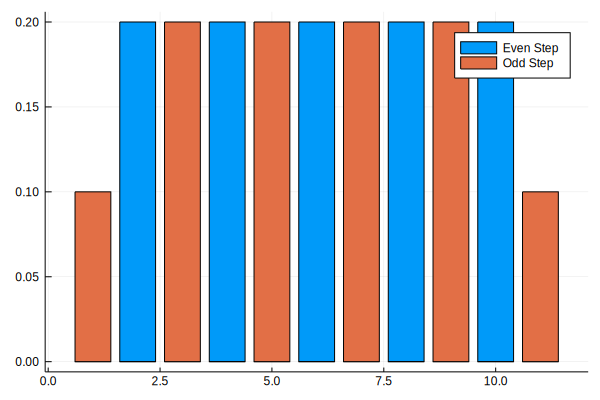

In [21]:
bar(x,label="Even Step")
x = A*x
bar!(x,label="Odd Step")

In [22]:
A*(A*(A*(A*x)))

11-element Array{Float64,1}:
 0.10000000000000009
 0.0                
 0.20000000000000015
 0.0                
 0.20000000000000007
 0.0                
 0.19999999999999996
 0.0                
 0.19999999999999987
 0.0                
 0.09999999999999992

In [23]:
x = zeros(11); x[1] = 1
A^101 * x

11-element Array{Float64,1}:
 0.0                
 0.2023938957107756 
 0.0                
 0.20147950875119836
 0.0                
 0.19999999979779956
 0.0                
 0.1985204911238349 
 0.0                
 0.19760610461639155
 0.0                

In [24]:
A = Tridiagonal(0.5*ones(10),zeros(11),0.5*ones(10))
A[1,1] = 0.5
A[11,11] = 0.5
A

11×11 Tridiagonal{Float64,Array{Float64,1}}:
 0.5  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.5

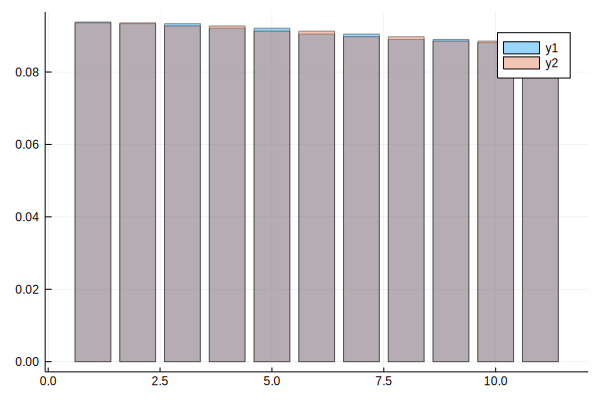

In [25]:
x = zeros(11); x[1] = 1
x = A^100 * x
bar(x,alpha=0.4)
x = A*x
bar!(x,alpha=0.4)

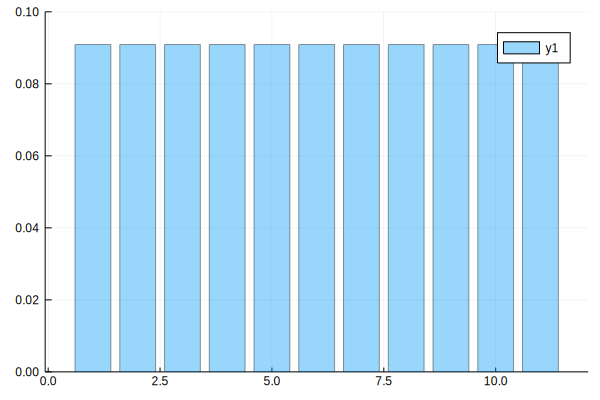

In [26]:
x = zeros(11); x[1] = 1
x = A^10000 * x
bar(x,alpha=0.4,ylimits=(0,0.1))

In [27]:
x[1]

0.09090909090909055

In [28]:
1/11

0.09090909090909091

In [29]:
A*x

11-element Array{Float64,1}:
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055
 0.09090909090909055

In [31]:
A = Tridiagonal(0.5*ones(10),zeros(11),0.5*ones(10))
A[1,1] = 0.1
A[11,11] = 0.1
A[2,1] = 0.9
A[10,11] = 0.9
A

11×11 Tridiagonal{Float64,Array{Float64,1}}:
 0.1  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
 0.9  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅    ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.5   ⋅ 
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.0  0.9
  ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅    ⋅   0.5  0.1

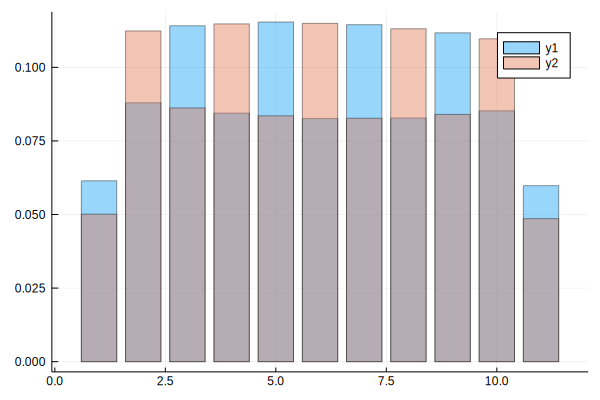

In [32]:
x = zeros(11); x[1] = 1
x = A^100 * x
bar(x,alpha=0.4)
x = A*x
bar!(x,alpha=0.4)

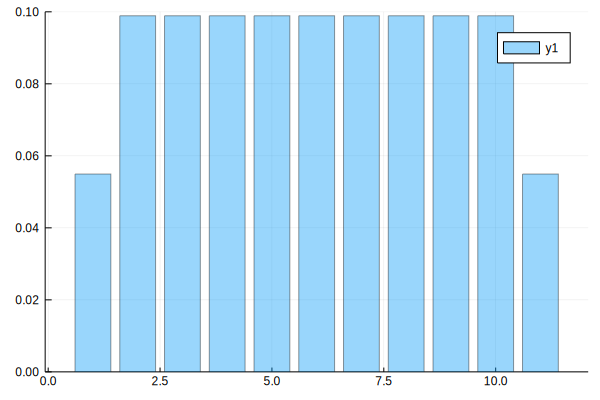

In [33]:
x = zeros(11); x[1] = 1
x = A^10000 * x
bar(x,alpha=0.4,ylimits=(0,0.1))

In [35]:
A*x

11-element Array{Float64,1}:
 0.05494505494505207 
 0.09890109890109378 
 0.09890109890109372 
 0.0989010989010938  
 0.09890109890109375 
 0.09890109890109382 
 0.09890109890109373 
 0.0989010989010938  
 0.09890109890109373 
 0.0989010989010938  
 0.054945054945052085